In [1]:
#%%
from pymc3 import Model, Beta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 192415
positive = 20

binomial_model1 = Model()
with binomial_model1:
    
    theta = Beta('theta', 15, 94092)
    lambda1 = Beta('lambda1', 142, 1)
    lambda0 = Beta('lambda0', 3, 1363)

    L = np.power((theta*lambda1 + (1 - theta)*lambda0), positive) * np.power((theta*(1 - lambda1) + (1 - theta)*(1 - lambda0)), N - positive)

    sensitivity = lambda1
    specificity = 1 - lambda0

In [3]:
from pymc3 import NUTS, sample
from scipy import optimize

with binomial_model1:
    # draw 2000 posterior samples
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.22029: 100%|██████████| 200000/200000 [00:18<00:00, 11059.68it/s]
Finished [100%]: Average ELBO = -0.23772
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
100%|██████████| 2000/2000 [00:03<00:00, 604.29it/s]


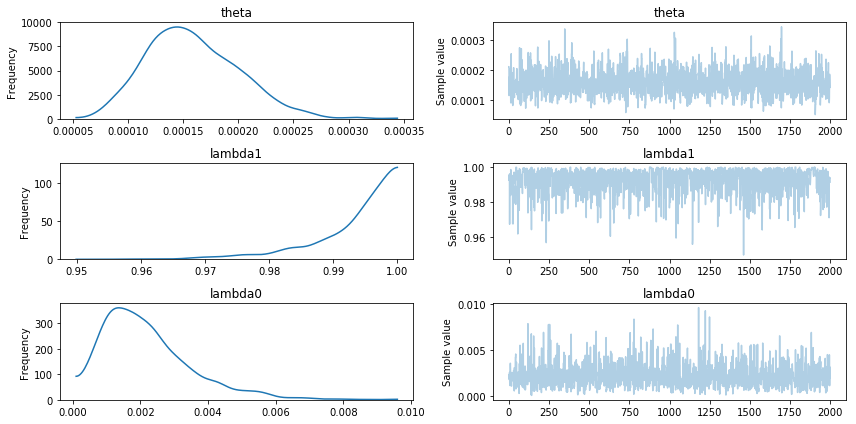

In [4]:
from pymc3 import traceplot
%matplotlib inline

traceplot(trace);

In [5]:
from pymc3 import summary

summary(trace)


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.000            0.000            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.000


lambda1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.993            0.007            0.000            [0.977, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.974          0.990          0.995          0.998          1.000


lambda0:

  Mean             SD               MC Error         95% HPD interval
  ---------------------

AttributeError: 'TransformedRV' object has no attribute 'distplot'

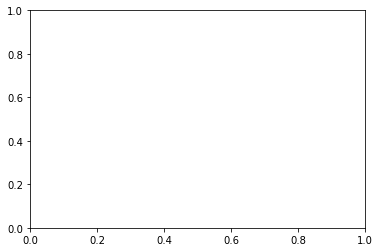